In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary

In [6]:
# prompt: import piplite
# from js import fetch
# import io
# URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# resp = await fetch(URL)
# dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
# df=pd.read_csv(dataset_part_2_csv)
# df.head(5).use another way would do the same

import requests
import io
# URL of the CSV file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the CSV data using requests
response = requests.get(URL)
response.raise_for_status()  # Raise an exception if the request was unsuccessful

# Create a DataFrame from the CSV data
df = pd.read_csv(io.StringIO(response.text))

# Print the first 5 rows of the DataFrame
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
df.shape

(90, 18)

First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

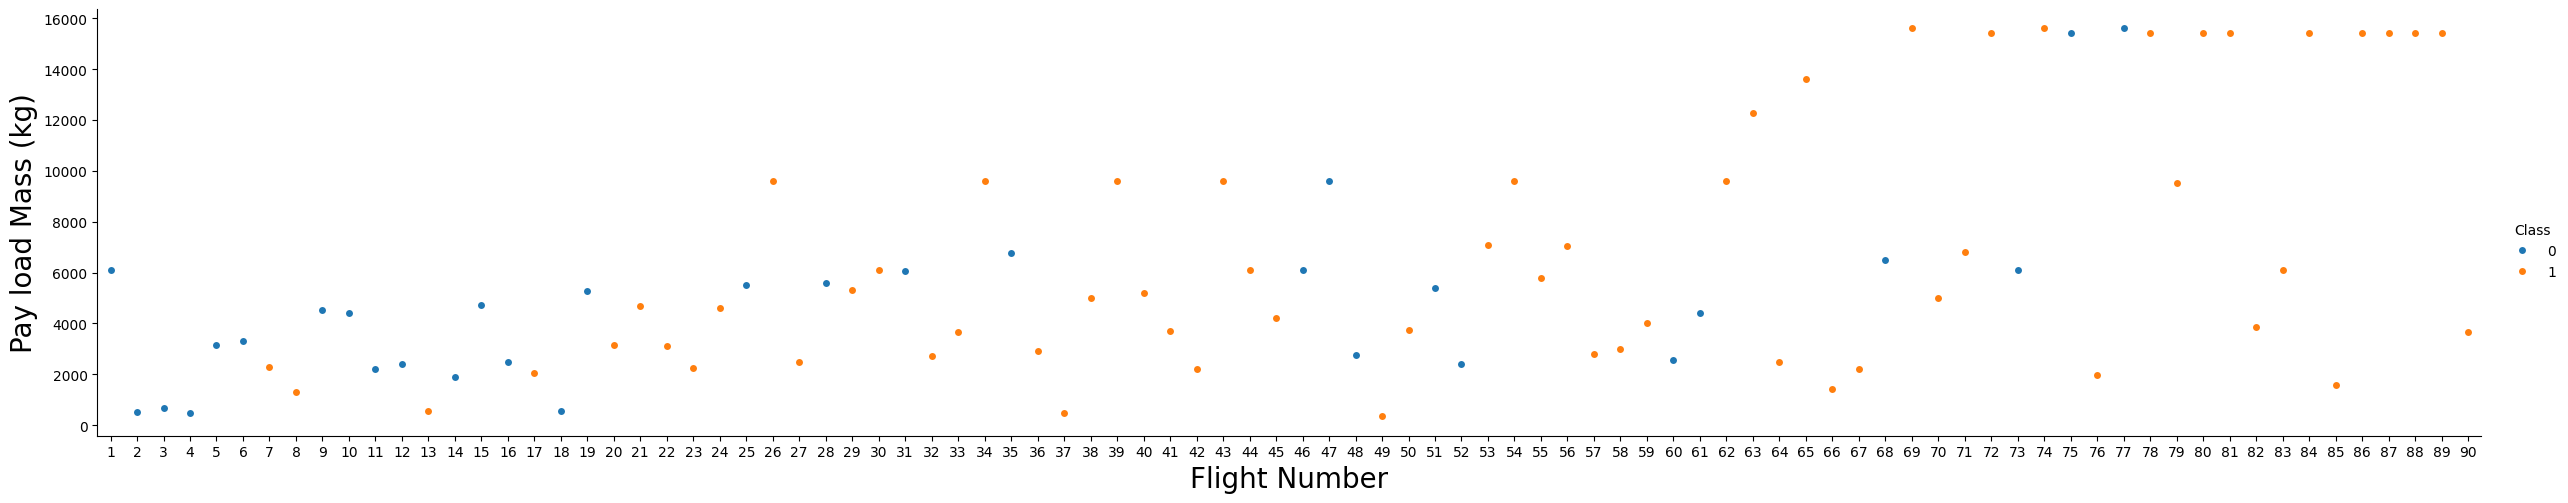

In [8]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

## TASK 1: Visualize the relationship between Flight Number and Launch Site
**Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'**

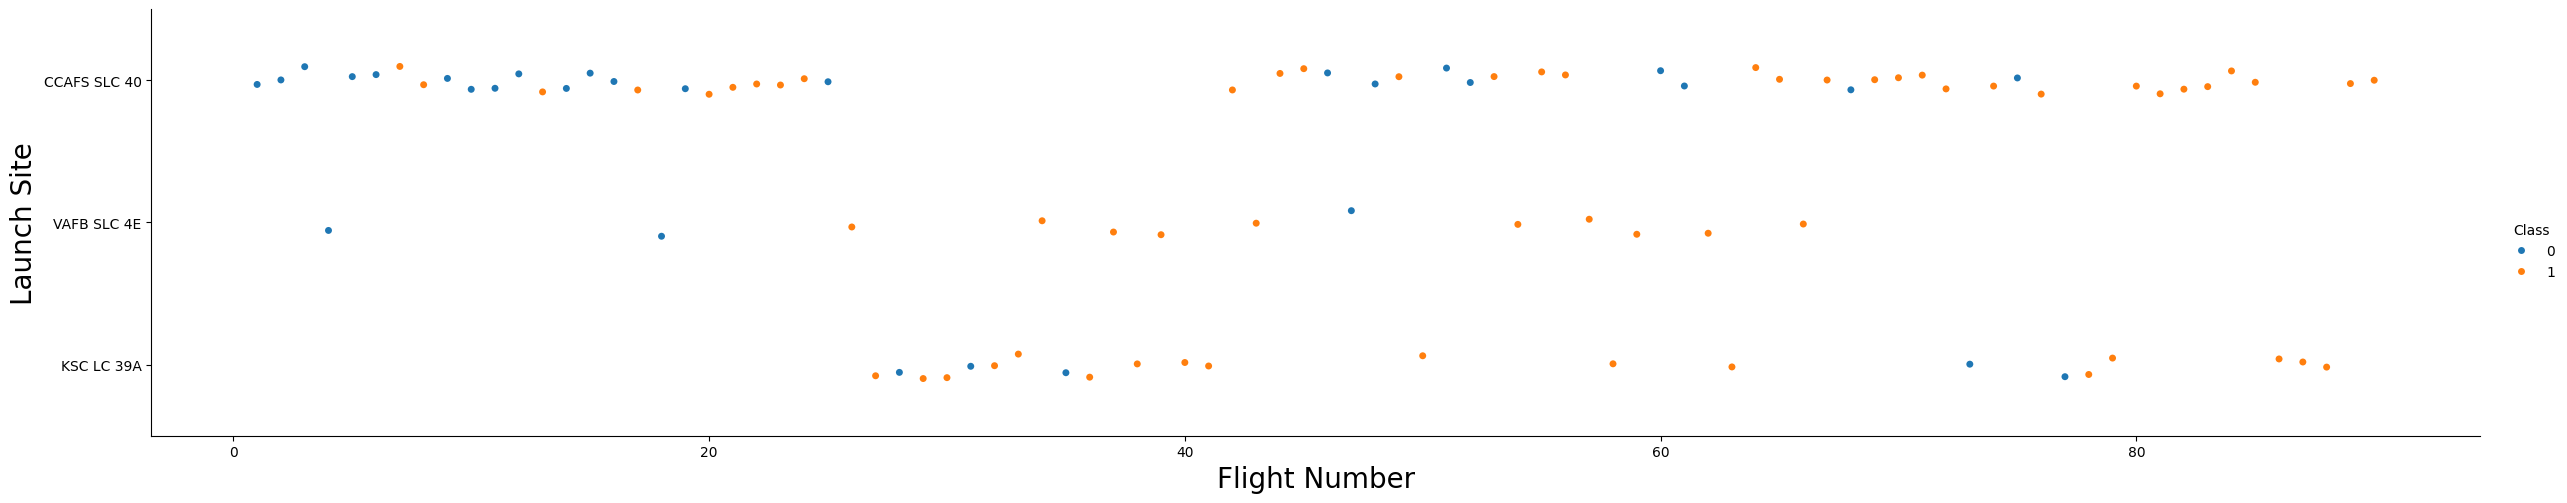

In [9]:
# prompt: TASK 1: Visualize the relationship between Flight Number and Launch Site
# Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

## TASK 2: Visualize the relationship between Payload Mass and Launch Site






** We also want to observe if there is any relationship between launch sites and their payload mass.**

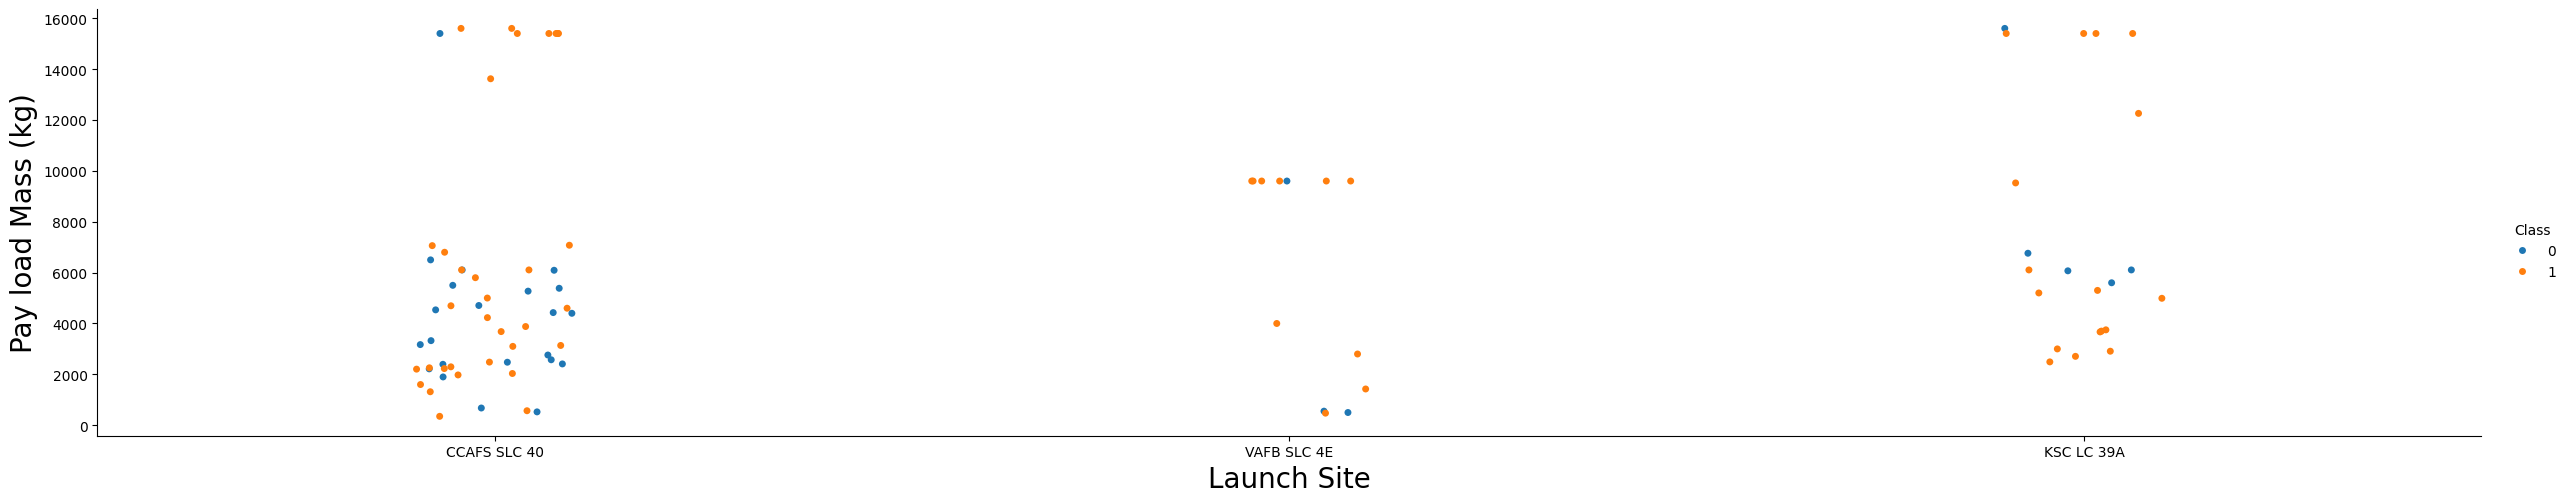

In [10]:
# prompt: TASK 2: Visualize the relationship between Payload Mass and Launch Site¶
# We also want to observe if there is any relationship between launch sites and their payload mass.

# TASK 2: Visualize the relationship between Payload Mass and Launch Site
sns.catplot(x='LaunchSite', y='PayloadMass', hue='Class', data=df, aspect=5)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

## TASK 3: Visualize the relationship between success rate of each orbit type
Next, we want to visually check if there are any relationship between success rate and orbit type.
Let's create a bar chart for the sucess rate of each orbit

In [12]:
# prompt: TASK 3: Visualize the relationship between success rate of each orbit type
# Next, we want to visually check if there are any relationship between success rate and orbit type. Let's create a bar chart for the sucess rate of each orbit

# Group data by Orbit and calculate the mean success rate for each orbit
orbit_success_rate = df.groupby('Orbit')['Class'].mean()

orbit_success_rate

,Class
Orbit,
ES-L1,1.000000
GEO,1.000000
GTO,0.518519
HEO,1.000000
ISS,0.619048
LEO,0.714286
MEO,0.666667
PO,0.666667
SO,0.000000


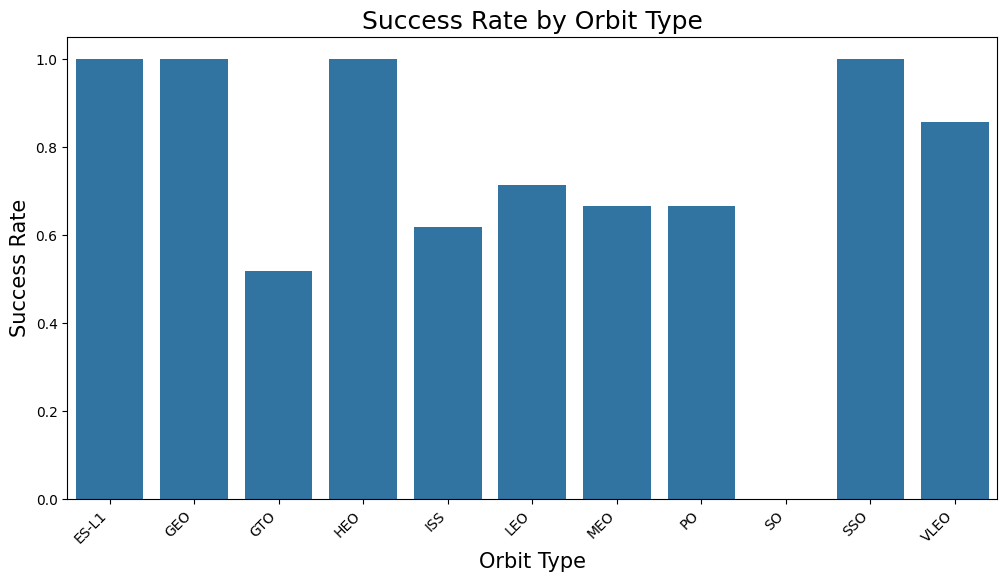

In [13]:
# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=orbit_success_rate.index, y=orbit_success_rate.values)
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate by Orbit Type", fontsize=18)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

##TASK 4: Visualize the relationship between FlightNumber and Orbit type¶

**For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.**

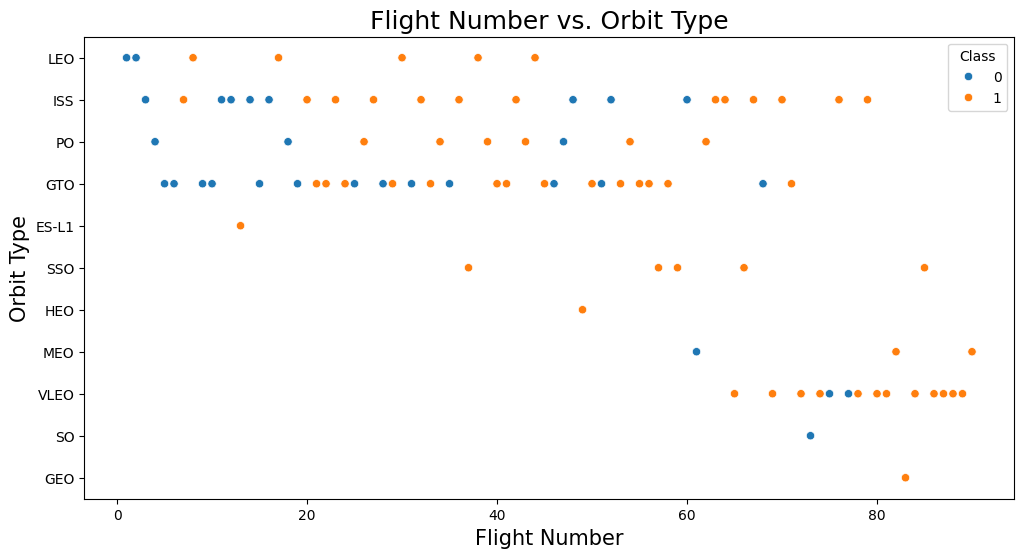

In [14]:
# prompt: TASK 4: Visualize the relationship between FlightNumber and Orbit type¶
# For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

# TASK 4: Visualize the relationship between FlightNumber and Orbit type

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Flight Number vs. Orbit Type", fontsize=18)
plt.show()

##TASK 5: Visualize the relationship between Payload Mass and Orbit type¶






Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type

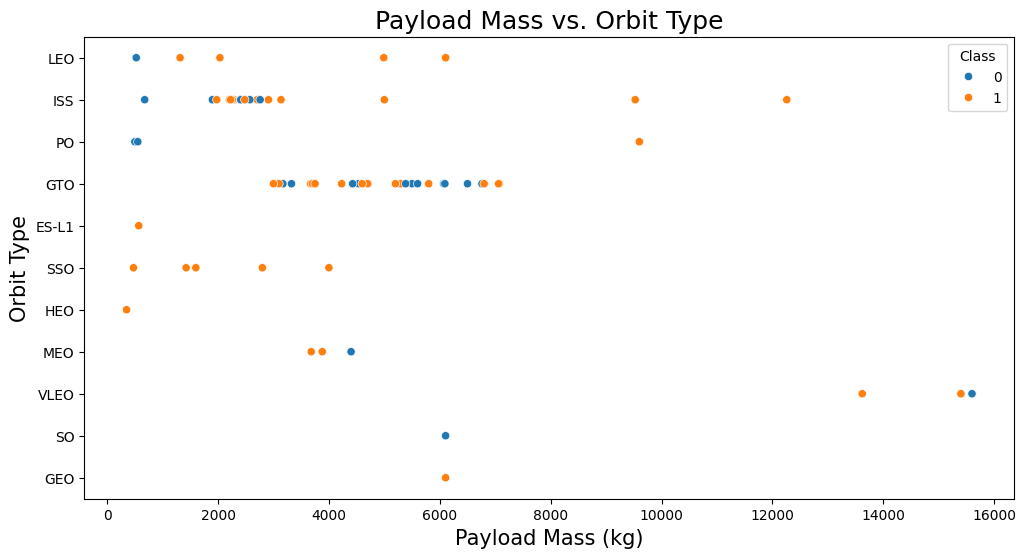

In [15]:
# prompt: TASK 5: Visualize the relationship between Payload Mass and Orbit type¶
# Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type

# TASK 5: Visualize the relationship between Payload Mass and Orbit type

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Payload Mass vs. Orbit Type", fontsize=18)
plt.show()

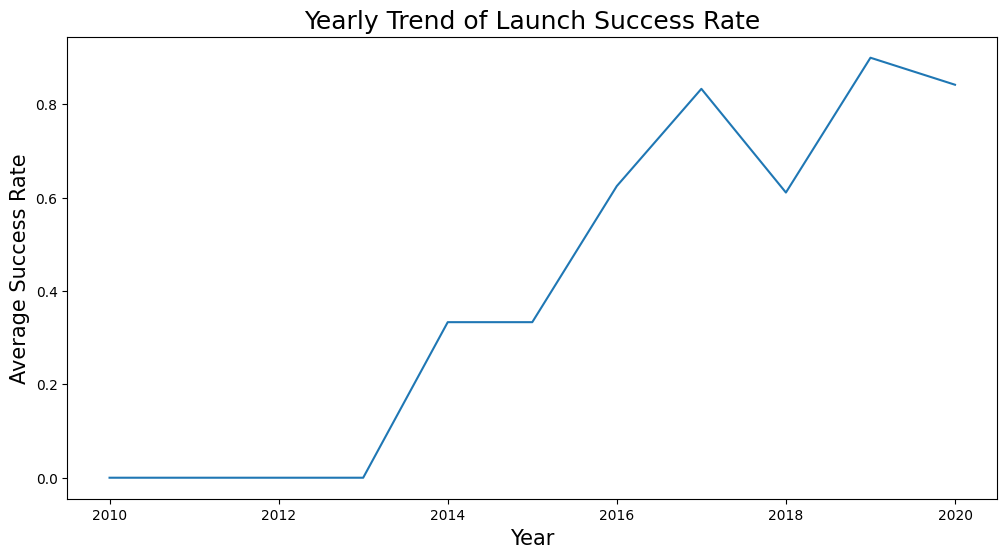

In [16]:
# prompt: TASK 6: Visualize the launch success yearly trend¶
# You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.
# The function will help you get the year from the date:

# Function to extract year from date
def extract_year(date):
  try:
    return int(date.split('-')[0])
  except:
    return None

# Apply the function to the 'Date' column to create a new 'Year' column
df['Year'] = df['Date'].apply(extract_year)

# Group data by Year and calculate the average success rate for each year
yearly_success_rate = df.groupby('Year')['Class'].mean()

# Create a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_success_rate.index, y=yearly_success_rate.values)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Success Rate", fontsize=15)
plt.title("Yearly Trend of Launch Success Rate", fontsize=18)
plt.show()

##Features Engineering






By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [17]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [21]:
# prompt:  prompt: TASK 7: Create dummy variables to categorical columns¶
# # Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# prompt: TASK 8: Cast all numeric columns to float64
# Now that our features_one_hot dataframe only contains numbers, cast the entire dataframe to variable type float64

# Cast all numeric columns to float64
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
features_one_hot.to_csv('dataset_part\_3.csv', index=False)